#Cleaning Data in Python
## 1. Common data problems
## 2. Text and categorical data problems
## 3. Advanced data problems
## 4. Record linkage

## 1. Common data problems

- 1.1 Data type constraints

- Common data types
  - Numeric data types
    - Number of points on customer
    - Salary earned monthly
    - Number of items bought in a basket
  - Text
    - Shipping address of a customer
    - City of residence
    - First name
  - Dates
    - Birthdates of clients
    - Order date of a product



In [116]:
# Numeric data or ... ?

import pandas as pd
fname = 'https://raw.githubusercontent.com/chesterheng/ai-for-industry/main/datasets/ride_sharing_new.csv'
ride_sharing = pd.read_csv(fname, index_col=0)

# Print the information of ride_sharing
print(ride_sharing.info())

# Print summary statistics of user_type column
print(ride_sharing['user_type'].describe())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25760 entries, 0 to 25759
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   ride_id          25760 non-null  int64 
 1   duration         25760 non-null  object
 2   station_A_id     25760 non-null  int64 
 3   station_A_name   25760 non-null  object
 4   station_B_id     25760 non-null  int64 
 5   station_B_name   25760 non-null  object
 6   bike_id          25760 non-null  int64 
 7   user_type        25760 non-null  int64 
 8   user_birth_year  25760 non-null  int64 
 9   user_gender      25760 non-null  object
 10  tire_sizes       25760 non-null  int64 
 11  ride_date        25760 non-null  object
dtypes: int64(7), object(5)
memory usage: 2.6+ MB
None
count    25760.000000
mean         2.008385
std          0.704541
min          1.000000
25%          2.000000
50%          2.000000
75%          3.000000
max          3.000000
Name: user_type, dtype: float6

- Question

The user_type column contains information on whether a user is taking a free ride and takes on the following values:

1. for free riders.
2. for pay per ride.
3. for monthly subscribers.

By looking at the summary statistics - they don't really seem to offer much description on how users are distributed along their purchase type, why do you think that is?

- Possible Answers

- [ ] The user_type column is not of the correct type, it should be converted to str.
- [ ] The user_type column has an infinite set of possible values, it should be converted to category.
- [x] The user_type column has an finite set of possible values that represent groupings of data, it should be converted to category.

In [117]:
import pandas as pd
fname = 'https://raw.githubusercontent.com/chesterheng/ai-for-industry/main/datasets/ride_sharing_new.csv'
ride_sharing = pd.read_csv(fname, index_col=0)

# Print the information of ride_sharing
print(ride_sharing.info())

# Print summary statistics of user_type column
print(ride_sharing['user_type'].describe())

# Convert user_type from integer to category
ride_sharing['user_type_cat'] = ride_sharing['user_type'].astype('category')

# Write an assert statement confirming the change
assert ride_sharing['user_type_cat'].dtype == 'category'

# Print new summary statistics 
print(ride_sharing['user_type_cat'].describe())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25760 entries, 0 to 25759
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   ride_id          25760 non-null  int64 
 1   duration         25760 non-null  object
 2   station_A_id     25760 non-null  int64 
 3   station_A_name   25760 non-null  object
 4   station_B_id     25760 non-null  int64 
 5   station_B_name   25760 non-null  object
 6   bike_id          25760 non-null  int64 
 7   user_type        25760 non-null  int64 
 8   user_birth_year  25760 non-null  int64 
 9   user_gender      25760 non-null  object
 10  tire_sizes       25760 non-null  int64 
 11  ride_date        25760 non-null  object
dtypes: int64(7), object(5)
memory usage: 2.6+ MB
None
count    25760.000000
mean         2.008385
std          0.704541
min          1.000000
25%          2.000000
50%          2.000000
75%          3.000000
max          3.000000
Name: user_type, dtype: float6

In [118]:
# Summing strings and concatenating numbers

import pandas as pd
fname = 'https://raw.githubusercontent.com/chesterheng/ai-for-industry/main/datasets/ride_sharing_new.csv'
ride_sharing = pd.read_csv(fname, index_col=0)

# Strip duration of minutes
ride_sharing['duration_trim'] = ride_sharing['duration'].str.strip('minutes')

# Convert duration to integer
ride_sharing['duration_time'] = ride_sharing['duration_trim'].astype('int')

# Write an assert statement making sure of conversion
assert ride_sharing['duration_time'].dtype == 'int'

# Print formed columns and calculate average ride duration 
print(ride_sharing[['duration','duration_trim','duration_time']])
print(ride_sharing['duration_time'].mean())

         duration duration_trim  duration_time
0      12 minutes           12              12
1      24 minutes           24              24
2       8 minutes            8               8
3       4 minutes            4               4
4      11 minutes           11              11
...           ...           ...            ...
25755  11 minutes           11              11
25756  10 minutes           10              10
25757  14 minutes           14              14
25758  14 minutes           14              14
25759  29 minutes           29              29

[25760 rows x 3 columns]
11.389052795031056


In [119]:
# 1.2 Data range constraints

# Tire size constraints

import pandas as pd
fname = 'https://raw.githubusercontent.com/chesterheng/ai-for-industry/main/datasets/ride_sharing_new.csv'
ride_sharing = pd.read_csv(fname, index_col=0)

# Convert tire_sizes to integer
ride_sharing['tire_sizes'] = ride_sharing['tire_sizes'].astype('int')

# Set all values above 27 to 27
ride_sharing.loc[ride_sharing['tire_sizes'] > 27, 'tire_sizes'] = 27

# Reconvert tire_sizes back to categorical
ride_sharing['tire_sizes'] = ride_sharing['tire_sizes'].astype('category')

# Print tire size description
print(ride_sharing['tire_sizes'].describe())

count     25760
unique        2
top          27
freq      19272
Name: tire_sizes, dtype: int64


In [120]:
# Back to the future
import pandas as pd
fname = 'https://raw.githubusercontent.com/chesterheng/ai-for-industry/main/datasets/ride_sharing_new.csv'
ride_sharing = pd.read_csv(fname, index_col=0)

# Convert ride_date to datetime
ride_sharing['ride_dt'] = pd.to_datetime(ride_sharing['ride_date'])

# Save today's date
today = pd.to_datetime('now')

# Set all in the future to today's date
ride_sharing.loc[ride_sharing['ride_dt'] > today, 'ride_dt'] = today

# Print maximum of ride_dt column
print(ride_sharing['ride_dt'].max())


2021-03-01 04:21:40.091164


- 1.3 Uniqueness constraints

- How big is your subset?

You have the following loans DataFrame which contains loan and credit score data for consumers, and some metadata such as their first and last names. You want to find both complete and incomplete duplicates using .duplicated().

|first_name|last_name |credit_score|has_loan|

|Justin   |Saddlemeyer|600         |1       |

|Hadrien  |Lacroix    |450         |0       |

Choose the correct usage of .duplicated() below:

- [ ] loans.duplicated() Because the default method returns both complete and incomplete duplicates.
- [ ] loans.duplicated(subset = 'first_name') Because constraining the duplicate rows to the first name lets me find incomplete duplicates as well.
- [x] loans.duplicated(subset = ['first_name', 'last_name'], keep = False) Because subsetting on consumer metadata and not discarding any duplicate returns all duplicated rows.
- [ ] loans.duplicated(subset = ['first_name', 'last_name'], keep = 'first') Because this drops all duplicates.

In [121]:
# Finding duplicates

import pandas as pd
fname = 'https://raw.githubusercontent.com/chesterheng/ai-for-industry/main/datasets/ride_sharing_new.csv'
ride_sharing = pd.read_csv(fname, index_col=0)

# Find duplicates
duplicates = ride_sharing.duplicated('ride_id', keep = False)

# Sort your duplicated rides
duplicated_rides = ride_sharing[duplicates].sort_values(by = 'ride_id')

# Print relevant columns of duplicated_rides
print(duplicated_rides[['ride_id','duration','user_birth_year']])

    ride_id    duration  user_birth_year
22       33  10 minutes             1982
32       33  12 minutes             1980
39       33   7 minutes             1986
53       55  14 minutes             1998
54       55  12 minutes             1999
65       55  10 minutes             1986
70       71  38 minutes             1988
74       71   5 minutes             1990
75       71  11 minutes             1999
76       89  18 minutes             1980
77       89   9 minutes             1996
88       89   6 minutes             1983


In [122]:
# Treating duplicates

import pandas as pd
fname = 'https://raw.githubusercontent.com/chesterheng/ai-for-industry/main/datasets/ride_sharing_new.csv'
ride_sharing = pd.read_csv(fname, index_col=0)
ride_sharing['duration'] = ride_sharing['duration'].str.strip('minutes')
ride_sharing['duration'] = ride_sharing['duration'].astype('int')

# Drop complete duplicates from ride_sharing
ride_dup = ride_sharing.drop_duplicates()

# Create statistics dictionary for aggregation function
statistics = {'user_birth_year': 'min', 'duration': 'mean'}

# Group by ride_id and compute new statistics
ride_unique = ride_dup.groupby('ride_id').agg(statistics).reset_index()
# print(ride_unique.loc[(ride_unique.ride_id == 89)])

# Find duplicated values again
duplicates = ride_unique.duplicated(subset = 'ride_id', keep = False)
duplicated_rides = ride_unique[duplicates == True]

# Assert duplicates are processed
assert duplicated_rides.shape[0] == 0


## 2. Text and categorical data problems

- 2.1 Membership constraints

Map the data problem observed with the correct type of data problem.

- Membership Constraint
  - A month column with the value 14.
  - A GPA column containing a Z- grade.
  - A has_loan column with the value 12.
  - A day_of_week column with the value Suntermonday.

- Other Constraint
  - An age column with values above 130.
  - A revenue column represented as a string.
  - A birthdate column with values in the future.


In [123]:
# Finding consistency

import pandas as pd
fname = 'https://raw.githubusercontent.com/chesterheng/ai-for-industry/main/datasets/airlines_final.csv'
airlines = pd.read_csv(fname)

data = {
  'cleanliness':  ['Clean', 'Average','Somewhat clean', 'Somewhat dirty', 'Dirty'],
  'safety': ['Neutral', 'Very safe','Somewhat safe', 'Very unsafe', 'Somewhat unsafe'],
  'satisfaction': ['Very satisfied','Neutral', 'Somewhat satisfied', 'Somewhat unsatisfied', 'Very unsatisfied']
}
columns = ['cleanliness','safety','satisfaction']
categories = pd.DataFrame (data, columns=columns)

# Print categories DataFrame
print(categories)

# Print unique values of survey columns in airlines
print('Cleanliness: ', airlines['cleanliness'].unique(), "\n")
print('Safety: ', airlines['safety'].unique(), "\n")
print('Satisfaction: ', airlines['satisfaction'].unique(), "\n")

      cleanliness           safety          satisfaction
0           Clean          Neutral        Very satisfied
1         Average        Very safe               Neutral
2  Somewhat clean    Somewhat safe    Somewhat satisfied
3  Somewhat dirty      Very unsafe  Somewhat unsatisfied
4           Dirty  Somewhat unsafe      Very unsatisfied
Cleanliness:  ['Clean' 'Average' 'Somewhat clean' 'Somewhat dirty' 'Dirty'] 

Safety:  ['Neutral' 'Very safe' 'Somewhat safe' 'Very unsafe' 'Somewhat unsafe'] 

Satisfaction:  ['Very satisfied' 'Neutral' 'Somewhat satsified' 'Somewhat unsatisfied'
 'Very unsatisfied'] 



- Question

Take a look at the output. Out of the cleanliness, safety and satisfaction columns, which one has an inconsistent category and what is it?

- [x] cleanliness because it has an Unacceptable category.
- [ ] cleanliness because it has a Terribly dirty category.
- [ ] satisfaction because it has a Very satisfied category.
- [ ] safety because it has a Neutral category.

In [124]:
# Finding consistency

import pandas as pd
fname = 'https://raw.githubusercontent.com/chesterheng/ai-for-industry/main/datasets/airlines_final.csv'
airlines = pd.read_csv(fname)

# Find the cleanliness category in airlines not in categories
cat_clean = set(airlines['cleanliness']).difference(categories['cleanliness'])
# cat_clean = {'Unacceptable'}

# Find rows with that category
cat_clean_rows = airlines['cleanliness'].isin(cat_clean)
# 0       False
# 1       False
# 2       False
# 3       False
# 4        True
#         ...  
# 2472    False
# 2473    False
# 2474    False
# 2475    False
# 2476    False

# Print rows with inconsistent category
print(airlines[cat_clean_rows])

# Print rows with consistent categories only
print(airlines[~cat_clean_rows])

Empty DataFrame
Columns: [Unnamed: 0, id, full_name, day, airline, destination, dest_region, dest_size, boarding_area, dept_time, wait_min, cleanliness, safety, satisfaction, survey_response]
Index: []
      Unnamed: 0    id  ...        satisfaction survey_response
0              0  1351  ...      Very satisfied          Value3
1              1   373  ...      Very satisfied          Value3
2              2  2820  ...             Neutral          Value2
3              3  1157  ...  Somewhat satsified          Value3
4              4  2992  ...  Somewhat satsified          Value2
...          ...   ...  ...                 ...             ...
2472        2804  1475  ...  Somewhat satsified          Value2
2473        2805  2222  ...      Very satisfied          Value3
2474        2806  2684  ...      Very satisfied          Value3
2475        2807  2549  ...      Very satisfied          Value3
2476        2808  2162  ...  Somewhat satsified          Value2

[2477 rows x 15 columns]


- 2.2 Categorical variables
- Categories of errors

White spaces and inconsistency
- .str.strip()
- .str.upper()
- .str.lower()

Creating or remapping categories
- pandas.qcut()
- pandas.cut()
- .replace()

In [125]:
# Inconsistent categories

import pandas as pd
fname = 'https://raw.githubusercontent.com/chesterheng/ai-for-industry/main/datasets/airlines_final.csv'
airlines = pd.read_csv(fname)

# Print unique values of both columns
print(airlines['dest_region'].unique())
print(airlines['dest_size'].unique())

# Lower dest_region column and then replace "eur" with "europe"
airlines['dest_region'] = airlines['dest_region'].str.lower()
airlines['dest_region'] = airlines['dest_region'].replace({'eur':'europe'})

# Remove white spaces from `dest_size`
airlines['dest_size'] = airlines['dest_size'].str.strip()

# Verify changes have been effected
print(airlines['dest_region'].unique())
print(airlines['dest_size'].unique())

['Asia' 'Canada/Mexico' 'West US' 'East US' 'Midwest US' 'EAST US'
 'Middle East' 'Europe' 'eur' 'Central/South America'
 'Australia/New Zealand' 'middle east']
['Hub' 'Small' '    Hub' 'Medium' 'Large' 'Hub     ' '    Small'
 'Medium     ' '    Medium' 'Small     ' '    Large' 'Large     ']
['asia' 'canada/mexico' 'west us' 'east us' 'midwest us' 'middle east'
 'europe' 'central/south america' 'australia/new zealand']
['Hub' 'Small' 'Medium' 'Large']


From looking at the output, what do you think is the problem with these columns?

```
dest_region category = 
['Asia' 'Canada/Mexico' 'West US' 'East US' 'Midwest US' 'EAST US'
 'Middle East' 'Europe' 'eur' 'Central/South America'
 'Australia/New Zealand' 'middle east']

dest_size category =
['Hub' 'Small' '    Hub' 'Medium' 'Large' 'Hub     ' '    Small'
 'Medium     ' '    Medium' 'Small     ' '    Large' 'Large     ']
```

- [ ] The dest_region column has only inconsistent values due to capitalization.
- [ ] The dest_region column has inconsistent values due to capitalization and has one value that needs to be remapped.
- [ ] The dest_size column has only inconsistent values due to leading and trailing spaces.
- [x] Both 2 and 3 are correct.

In [126]:
# Remapping categories

import pandas as pd
fname = 'https://raw.githubusercontent.com/chesterheng/ai-for-industry/main/datasets/airlines_final.csv'
airlines = pd.read_csv(fname)

# Create ranges for categories
import numpy as np
label_ranges = [0, 60, 180, np.inf]
label_names = ['short', 'medium', 'long']

# Create wait_type column
airlines['wait_type'] = pd.cut(airlines['wait_min'], bins = label_ranges, labels = label_names)

# Create mappings and replace
mappings = {'Monday':'weekday', 'Tuesday':'weekday', 'Wednesday': 'weekday', 
            'Thursday': 'weekday', 'Friday': 'weekday', 
            'Saturday': 'weekend', 'Sunday': 'weekend'}

airlines['day_week'] = airlines['day'].replace(mappings)
print(airlines)

      Unnamed: 0    id full_name  ... survey_response wait_type day_week
0              0  1351       Sam  ...          Value3    medium  weekday
1              1   373    George  ...          Value3    medium  weekday
2              2  2820  Jennifer  ...          Value2    medium  weekday
3              3  1157    George  ...          Value3      long  weekday
4              4  2992       Sam  ...          Value2      long  weekday
...          ...   ...       ...  ...             ...       ...      ...
2472        2804  1475      Matt  ...          Value2      long  weekday
2473        2805  2222       Sam  ...          Value3    medium  weekday
2474        2806  2684       Ann  ...          Value3    medium  weekday
2475        2807  2549      Matt  ...          Value3    medium  weekday
2476        2808  2162       Sam  ...          Value2      long  weekend

[2477 rows x 17 columns]


In [127]:
# 2.3 Cleaning text data

# Removing titles and taking names

import pandas as pd
fname = 'https://raw.githubusercontent.com/chesterheng/ai-for-industry/main/datasets/airlines_final.csv'
airlines = pd.read_csv(fname)

# Replace "Dr." with empty string ""
airlines['full_name'] = airlines['full_name'].str.replace("Dr.","")

# Replace "Mr." with empty string ""
airlines['full_name'] = airlines['full_name'].str.replace("Mr.","")

# Replace "Miss" with empty string ""
airlines['full_name'] = airlines['full_name'].str.replace("Miss","")

# Replace "Ms." with empty string ""
airlines['full_name'] = airlines['full_name'].str.replace("Ms.","")

# Assert that full_name has no honorifics
assert airlines['full_name'].str.contains('Ms.|Mr.|Miss|Dr.').any() == False

In [128]:
# Keeping it descriptive

import pandas as pd
fname = 'https://raw.githubusercontent.com/chesterheng/ai-for-industry/main/datasets/airlines_final.csv'
airlines = pd.read_csv(fname)
print(airlines)
# Store length of each row in survey_response column
resp_length = airlines['survey_response'].str.len()

# Find rows in airlines where resp_length > 40
airlines_survey = airlines[resp_length > 40]

# Assert minimum survey_response length is > 40
assert airlines_survey['survey_response'].str.len().min() > 40

# Print new survey_response column
print(airlines_survey['survey_response'])


      Unnamed: 0    id  ...        satisfaction survey_response
0              0  1351  ...      Very satisfied          Value3
1              1   373  ...      Very satisfied          Value3
2              2  2820  ...             Neutral          Value2
3              3  1157  ...  Somewhat satsified          Value3
4              4  2992  ...  Somewhat satsified          Value2
...          ...   ...  ...                 ...             ...
2472        2804  1475  ...  Somewhat satsified          Value2
2473        2805  2222  ...      Very satisfied          Value3
2474        2806  2684  ...      Very satisfied          Value3
2475        2807  2549  ...      Very satisfied          Value3
2476        2808  2162  ...  Somewhat satsified          Value2

[2477 rows x 15 columns]
8       He difficult contented we determine ourselves ...
10      He difficult contented we determine ourselves ...
11      He difficult contented we determine ourselves ...
16      He difficult contented w

## 3. Advanced data problems

**Ambiguous dates**

You have a DataFrame containing a subscription_date column that was collected from various sources with different Date formats such as YYYY-mm-dd and YYYY-dd-mm. 

What is the best way to unify the formats for ambiguous values such as 2019-04-07?

- [ ] Set them to NA and drop them.
- [ ] Infer the format of the data in question by checking the format of subsequent and previous values.
- [ ] Infer the format from the original data source.
- [x] All of the above are possible, as long as we investigate where our data comes from, and understand the dynamics affecting it before cleaning it.

In [129]:
# Uniform currencies

import pandas as pd
fname = 'https://raw.githubusercontent.com/chesterheng/ai-for-industry/main/datasets/banking_dirty.csv'
banking = pd.read_csv(fname, index_col=0)

# Find values of acct_cur that are equal to 'euro'
acct_eu = banking['acct_cur'] == 'euro'

# Convert acct_amount where it is in euro to dollars
banking.loc[acct_eu, 'acct_amount'] = banking.loc[acct_eu, 'acct_amount'] * 1.1 

# Unify acct_cur column by changing 'euro' values to 'dollar'
banking.loc[acct_eu, 'acct_cur'] = 'dollar'

# Assert that only dollar currency remains
assert banking['acct_cur'].unique() == 'dollar'

In [130]:
# Uniform dates

import pandas as pd
fname = 'https://raw.githubusercontent.com/chesterheng/ai-for-industry/main/datasets/banking_dirty.csv'
banking = pd.read_csv(fname, index_col=0)

# Print the header of account_opened
print(banking['account_opened'].head())

# Convert account_opened to datetime
banking['account_opened'] = pd.to_datetime(banking['account_opened'],
                                           # Infer datetime format
                                           infer_datetime_format = True,
                                           # Return missing value for error
                                           errors = 'coerce') 

# Get year of account opened
banking['acct_year'] = banking['account_opened'].dt.strftime('%Y')

# Print acct_year
print(banking['acct_year'])

0     2/9/18
1    28/2/19
2    25/4/18
3    7/11/17
4    14/5/18
Name: account_opened, dtype: object
0     2018
1     2019
2     2018
3     2017
4     2018
      ... 
95    2018
96    2017
97    2017
98    2017
99    2017
Name: acct_year, Length: 100, dtype: object


Question
Take a look at the output. You tried converting the values to datetime using the default to_datetime() function without changing any argument, however received the following error:

```ValueError: month must be in 1..12```

Why do you think that is?

Possible Answers

- [ ] The to_datetime() function needs to be explicitly told which date format each row is in.
- [ ] The to_datetime() function can only be applied on YY-mm-dd date formats.
- [x] The 21-14-17 entry is erroneous and leads to an error.

**Cross field validation**

- Confirm the Age provided by users by checking their birthdays
- Row wise operations such as `.sum(axis = 1)`

**Not cross field validation**

- Make sure a `subscription_date` column has no value set in the future
- The use of `.astype()` method
- Make sure that a `revenue` column is a numeric column




In [131]:
# How's our data integrity?

import pandas as pd
fname = 'https://raw.githubusercontent.com/chesterheng/ai-for-industry/main/datasets/banking_dirty.csv'
banking = pd.read_csv(fname, index_col=0)

# Store fund columns to sum against
fund_columns = ['fund_A', 'fund_B', 'fund_C', 'fund_D']

# Find rows where fund_columns row sum == inv_amount
inv_equ = banking[fund_columns].sum(axis = 1) == banking['inv_amount']

# Store consistent and inconsistent data
consistent_inv = banking[inv_equ]
inconsistent_inv = banking[~inv_equ]

# Store consistent and inconsistent data
print("Number of inconsistent investments: ", inconsistent_inv.shape[0])

Number of inconsistent investments:  8


In [132]:
# How's our data integrity?

import pandas as pd
fname = 'https://raw.githubusercontent.com/chesterheng/ai-for-industry/main/datasets/banking_dirty.csv'
banking = pd.read_csv(fname, index_col=0)

# Store today's date and find ages
# today = dt.date.today()
today = pd.to_datetime('now')

# ages_manual = today.year - banking['birth_date'].dt.year
ages_manual = today.year - pd.to_datetime(banking['birth_date']).dt.year

# Find rows where age column == ages_manual
age_equ = banking['age'] == ages_manual

# Store consistent and inconsistent data
consistent_ages = banking[age_equ]
inconsistent_ages = banking[~age_equ]

# Store consistent and inconsistent data
print("Number of inconsistent ages: ", inconsistent_ages.shape[0])

Number of inconsistent ages:  100


**Completeness**

Is this missing at random?

As a reminder, missingness types can be described as the following:

- Missing Completely at Random: No systematic relationship between a column's missing values and other or own values.
- Missing at Random: There is a systematic relationship between a column's missing values and other observed values.
- Missing not at Random: There is a systematic relationship between a column's missing values and unobserved values.

You have a DataFrame containing customer satisfaction scores for a service. 

What type of missingness is the following?

`A customer satisfaction_score column with missing values for highly dissatisfied customers.`

Possible Answers

- [ ] Missing completely at random.
- [ ] Missing at random.
- [x] Missing not at random.

cust_id             0
birth_date          0
age                 0
acct_amount         0
acct_cur            0
inv_amount          0
fund_A              0
fund_B              0
fund_C              0
fund_D              0
account_opened      0
last_transaction    0
dtype: int64


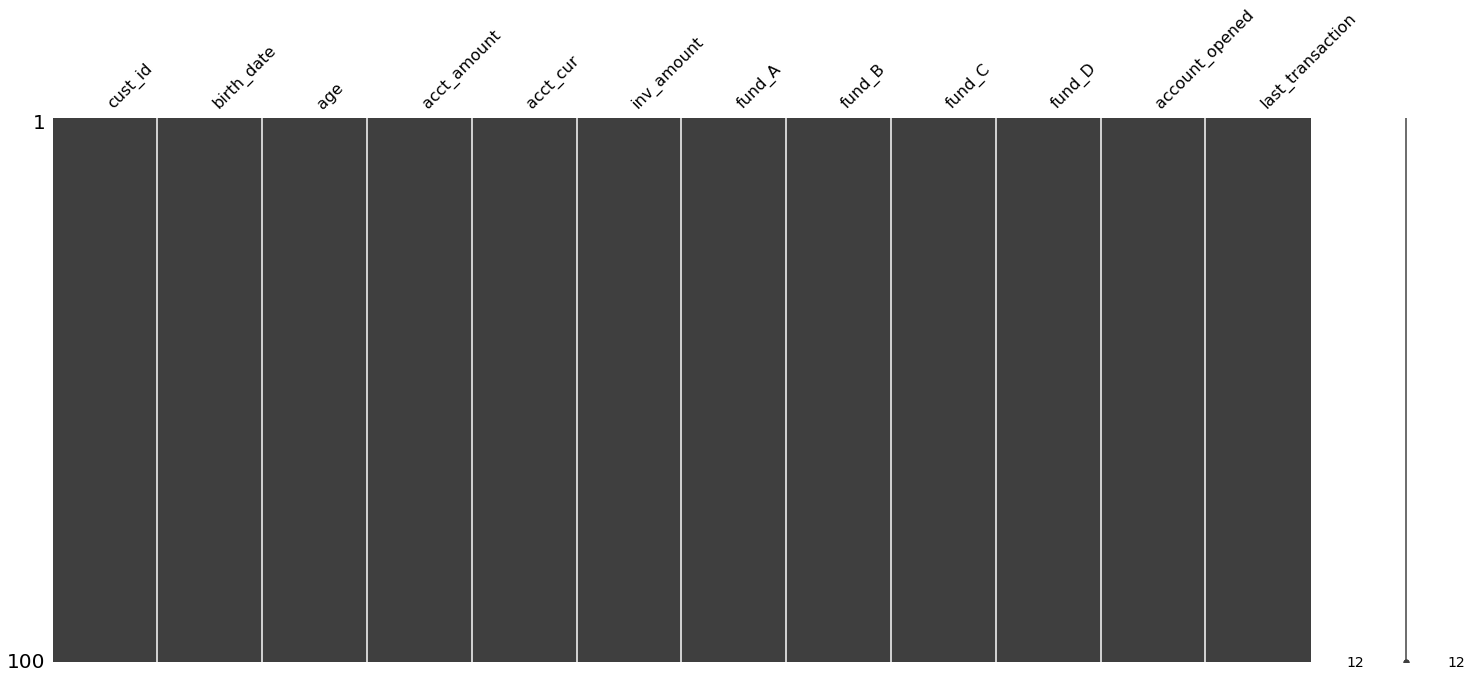

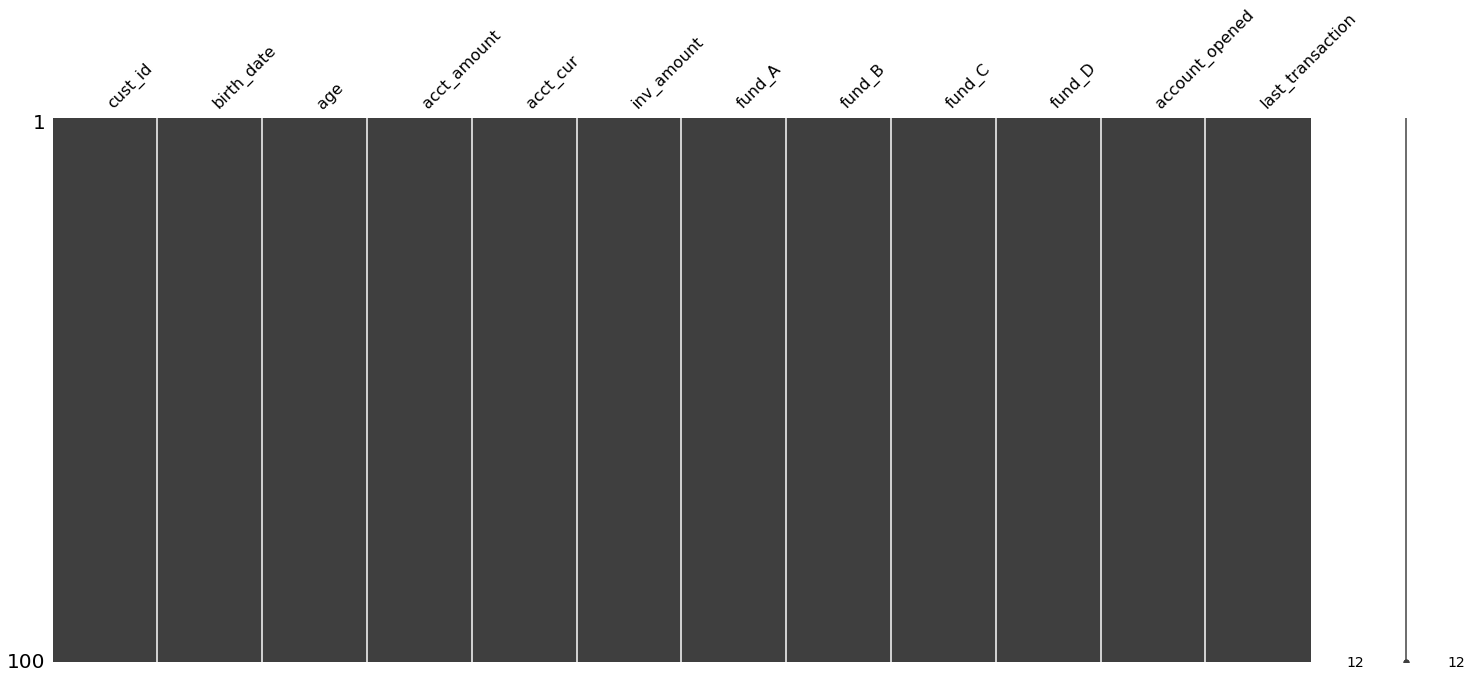

In [133]:
# Missing investors

import pandas as pd
fname = 'https://raw.githubusercontent.com/chesterheng/ai-for-industry/main/datasets/banking_dirty.csv'
banking = pd.read_csv(fname, index_col=0)

# Print number of missing values in banking
print(banking.isna().sum())

# Visualize missingness matrix
import missingno as msno
msno.matrix(banking)

import matplotlib.pyplot as plt  
plt.show()

# Isolate missing and non missing values of inv_amount
missing_investors = banking[banking['inv_amount'].isna()]
investors = banking[~banking['inv_amount'].isna()]

# Sort banking by age and visualize
banking_sorted = banking.sort_values(by = 'age')
msno.matrix(banking_sorted)
plt.show()

**Question**

Now that you've isolated `banking` into `investors` and `missing_investors`, use the `.describe()` method on both of these DataFrames in the console to understand whether there are structural differences between them. 

What do you think is going on?

**Possible Answers**

- [ ] The data is missing completely at random and there are no drivers behind the missingness.
- [x] The inv_amount is missing only for young customers, since the average age in missing_investors is 22 and the maximum age is 25.
- [ ] The inv_amount is missing only for old customers, since the average age in missing_investors is 42 and the maximum age is 59.

In [134]:
# Follow the money

import pandas as pd
fname = 'https://raw.githubusercontent.com/chesterheng/ai-for-industry/main/datasets/banking_dirty.csv'
banking = pd.read_csv(fname, index_col=0)

# Drop missing values of cust_id
banking_fullid = banking.dropna(subset = ['cust_id'])

# Compute estimated acct_amount
acct_imp = banking_fullid['inv_amount'] * 5

# Impute missing acct_amount with corresponding acct_imp
banking_imputed = banking_fullid.fillna({'acct_amount':acct_imp})

# Print number of missing values
print(banking_imputed.isna().sum())

cust_id             0
birth_date          0
age                 0
acct_amount         0
acct_cur            0
inv_amount          0
fund_A              0
fund_B              0
fund_C              0
fund_D              0
account_opened      0
last_transaction    0
dtype: int64


## 4. Record linkage

Minimum edit distance is the minimum number of steps needed to reach from String A to String B, with the operations available being:

- Insertion of a new character.
- Deletion of an existing character.
- Substitution of an existing character.
- Transposition of two existing consecutive characters.

What is the minimum edit distance from 'sign' to 'sing', and which operation(s) gets you there?

- [ ] 2 by substituting 'g' with 'n' and 'n' with 'g'.
- [x] 1 by transposing 'g' with 'n'.
- [ ] 1 by substituting 'g' with 'n'.
- [ ] 2 by deleting 'g' and inserting a new 'g' at the end.


In [135]:
# The cutoff point

import pandas as pd
fname = 'https://raw.githubusercontent.com/chesterheng/ai-for-industry/main/datasets/restaurants_L2_dirty.csv'
restaurants = pd.read_csv(fname, index_col=0)
print(restaurants.info())
# Import process from fuzzywuzzy
# !pip install fuzzywuzzy
from fuzzywuzzy import process

# Store the unique values of cuisine_type in unique_types
unique_types = restaurants['cuisine_type'].unique()
print(unique_types)
# Calculate similarity of 'asian' to all values of unique_types
print(process.extract('asian', unique_types, limit = len(unique_types)))

# Calculate similarity of 'american' to all values of unique_types
print(process.extract('american', unique_types, limit = len(unique_types)))

# Calculate similarity of 'italian' to all values of unique_types
print(process.extract('italian', unique_types, limit = len(unique_types)))

<class 'pandas.core.frame.DataFrame'>
Int64Index: 82 entries, 0 to 81
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   name          82 non-null     object
 1   addr          82 non-null     object
 2   city          82 non-null     object
 3   phone         82 non-null     int64 
 4   cuisine_type  82 non-null     object
dtypes: int64(1), object(4)
memory usage: 3.8+ KB
None
['american' 'californian' 'japanese' 'cajun/creole' 'hot dogs' 'diners'
 'delis' 'hamburgers' 'seafood' 'italian' 'coffee shops' 'russian'
 'steakhouses' 'mexican/tex-mex' 'noodle shops' 'mexican' 'middle eastern'
 'asian' 'vietnamese' 'health food' 'american ( new )' 'pacific new wave'
 'indonesian' 'eclectic' 'chicken' 'fast food' 'southern/soul' 'coffeebar'
 'continental' 'french ( new )' 'desserts' 'chinese' 'pizza']
[('asian', 100), ('indonesian', 72), ('italian', 67), ('russian', 67), ('american', 62), ('californian', 54), ('japanese', 5